The construction of a binary output linear SVM classifier is carried out to predict the waking and sleeping state of different subjects.

In [1]:
import os
import numpy as np
import pandas as pd
from random import sample
import statistics as stats
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import validation_curve
from sklearn.model_selection import RandomizedSearchCV

In this classifier, the linear SVM method has been used to classify wakefulness or light sleep from deep sleep. That is, an SVM classifier has been built with binary output: 0 and 1.

In [2]:
Train_bin= pd.read_csv('Train_binary.csv')
Test_bin= pd.read_csv('Test_binary.csv')

In [3]:
X_train_bin=Train_bin.drop(['Multiple label', 'Binary label','ID'], axis = 1) 
y_train_bin=Train_bin['Binary label']

X_test_bin=Test_bin.drop(['Multiple label', 'Binary label','ID'], axis = 1)
y_test_bin=Test_bin['Binary label']

In [4]:
#Creation of the model and selection of free parameters
clf = SVC(kernel='linear', decision_function_shape='ovr' ) 
modelo_base=clf.fit(X_train_bin,y_train_bin)

In [5]:
clf

SVC(kernel='linear')

In [6]:
SVC()

SVC()

In [7]:
#交叉验证
Cs =[0.1,1,10,100,1000] 
param_grid = {'C': Cs} 
svc_grid = GridSearchCV(clf, param_grid, scoring='accuracy',cv=5,n_jobs=-1)
svc_grid.fit(X_train_bin, y_train_bin)
best_param=svc_grid.best_params_

In [21]:
best_param

{'C': 0.1}

In [9]:
#Classifier with the best parameters
svc_clf=svc_grid.best_estimator_

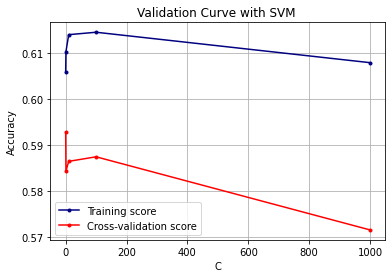

In [10]:
train_scores, test_scores = validation_curve(clf, X_train_bin, y_train_bin, param_name="C", param_range=Cs,cv=5)
train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
plt.title("Validation Curve with SVM ")
plt.xlabel('C')
plt.ylabel("Accuracy")
#plt.show()

plt.plot(Cs, train_scores_mean, label="Training score",color="navy",marker='.')
plt.plot(Cs, test_scores_mean, label="Cross-validation score",color="red",marker='.')
plt.grid()
plt.legend(loc="best")
plt.savefig('Image/C parameter.png' )
plt.show()

In [11]:
print("The optimal value is:",best_param)

The optimal value is: {'C': 0.1}


In [12]:
print("Base model hit rate:",modelo_base.score(X_test_bin,y_test_bin))
print("Model hit rate with the search for parameters:",svc_clf.score(X_test_bin,y_test_bin))
print('Improved:{:0.2f}%.'.format( 100 * (svc_clf.score(X_test_bin,y_test_bin) - modelo_base.score(X_test_bin,y_test_bin)) / modelo_base.score(X_test_bin,y_test_bin)))

Base model hit rate: 0.6303501945525292
Model hit rate with the search for parameters: 0.6303501945525292
Improved:0.00%.


In [22]:
#Model evaluation
predict = svc_clf.predict(X_test_bin)
acc_test= svc_clf.score(X_test_bin, y_test_bin).round(4)
acc_train= svc_clf.score(X_train_bin, y_train_bin).round(4)
print('The accuracy for the SVM model in the TEST set is:',acc_test,'%\n')
print('The accuracy for the SVM model in the Train set is:',acc_train,'%\n')

print("=============== Classification Report ================")
print(classification_report(y_test_bin, predict))

The accuracy for the SVM model in the TEST set is: 0.6304 %

The accuracy for the SVM model in the Train set is: 0.597 %

=============== Classification Report ================
              precision    recall  f1-score   support

         0.0       0.77      0.38      0.51       129
         1.0       0.59      0.88      0.70       128

    accuracy                           0.63       257
   macro avg       0.68      0.63      0.61       257
weighted avg       0.68      0.63      0.61       257



In [23]:
matriz_confusion=pd.crosstab (y_test_bin,predict, rownames=['Predicted class'], colnames=['Classification result'])
matriz_confusion

Classification result,0.0,1.0
Predicted class,,
0.0,49,80
1.0,15,113


#Visualization  
Below is an example of predicted versus actual sleep phases. To facilitate this visualization, half of the samples of the test subset are shown.

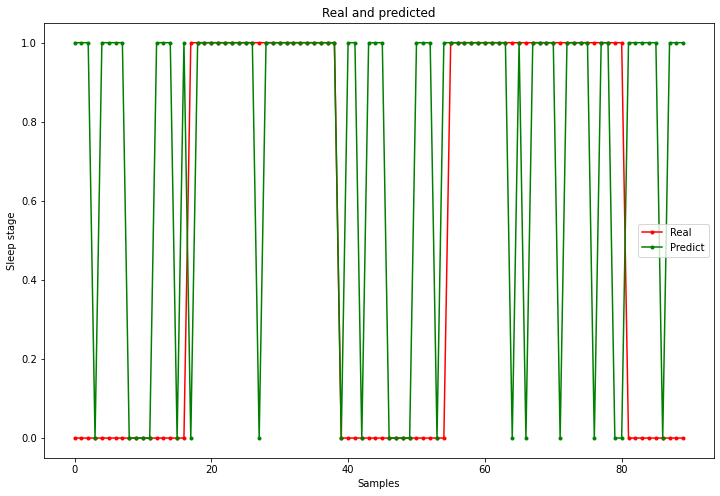

In [20]:
plt.figure(figsize=(12,8))
plt.plot(y_test_bin[0:90],color='red', marker='.',label='Real')
plt.plot(predict[0:90],color='green', marker='.',label='Predict')

plt.title('Real and predicted')
plt.xlabel('Samples')
plt.ylabel('Sleep stage')
plt.legend()
plt.savefig('Image/LB_SVM.png')

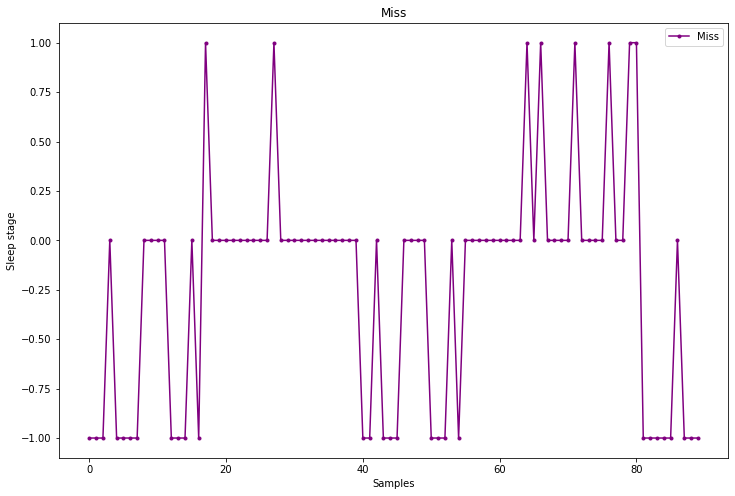

In [16]:
miss= y_test_bin - predict
plt.figure(figsize=(12,8))
plt.plot(miss[0:90],color='purple', marker='.',label='Miss')

plt.title('Miss')
plt.xlabel('Samples')
plt.ylabel('Sleep stage')
plt.legend()